# KC Layer Analysis: Non-overlapping inputs

In [49]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({
    'axes.spines.top': False,
    'axes.spines.right': False,
    'image.cmap': 'gray',
    'axes.grid': True,
    'grid.linestyle': ':',
})

In [55]:
# Load experiment results
with open('../results/kc_5.pickle', 'rb') as file:
    data = pickle.load(file)

Let's take a look at the overall KC population activity statistics. Our per-sample interval
size is 500ms (hard-coded, probably a bad idea). Activity within a 500ms
window of a sample is that sample's response profile (remember PNs spike more than once per
sample).

In [67]:
def get_rates(trains, duration, interval):
    """Calculate firing rates per sample-interval"""
    t_range = np.arange(0, duration, interval)
    z = len(t_range)
    rates = np.zeros((len(trains), z))
    for i,t in enumerate(t_range):
        for j,train in enumerate(trains):
            rates[j,i] = len(train[(train >= t) & (train < t+interval)])

    # Ignore totally inactive neurons
    active = [ i for i in range(z) if rates[i].sum() > 0 ]

    return rates[active]

rates = get_rates(data['kc'], data['duration'], 500)

### Population Rate (per-sample)

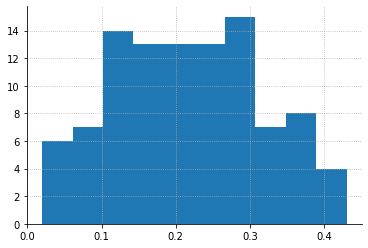

In [68]:
pop_rate = rates.mean(axis=0)
plt.hist(pop_rate)
plt.show()

### Lifetime Rate (per-neuron)

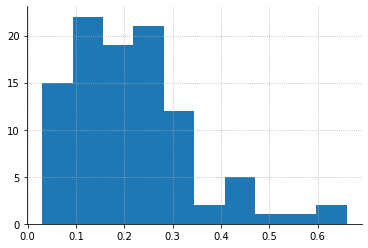

In [69]:
life_rate = rates.mean(axis=1)
plt.hist(life_rate)
plt.show()

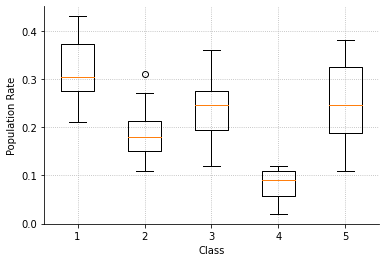

In [70]:
# Per-class activity
classes = np.unique(data['labels'])
by_class = [ rates[:,data['labels'] == c].mean(axis=0) for c in classes ]

plt.boxplot(by_class)
plt.xlabel("Class")
plt.ylabel("Population Rate")
plt.show()

In [71]:
print(data['duration']/500)

100.0
